# DLAN file creation notebook


This notebook will create the final version of the data that can be analysed for chapter 2/circadian disruption project. The data needs to be checked that the LDR is fine, and then annotated and saved. 

Explicit steps as follows: 
1. Import data  
2. Visualise data  
3. Remap the LDR so high = 200, low =0 <- may involve fixing any errors
4. Find the transitions between the conditions 
5. Label the different conditions in the light_period column
6. save the data 


In [1]:
import pathlib 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import actigraphy_analysis.actogram_plot as act


In [2]:
# set some constants 
chamber = "6C"
label_col = "light_period"
def quickplot(data):
    data.plot(subplots=True,
              figsize=(20,10))

### Step One - Import the data

In [3]:
input_dir = pathlib.Path("/Users/angusfisk/Documents/01_PhD_files/"
                         "09_pirdata/03_experiment_files")
file_name = "exp_11_6C_pir_data.csv"
file_path = input_dir / file_name
data = pd.read_csv(file_path,
                   index_col=0,
                   parse_dates=True)

In [4]:
# fix a few required settings in the dataframe
# sort index
# remove chamber column 
data.sort_index(inplace=True)
chamber_col = data.pop(chamber)

In [5]:
cols = ["dlan1",
       "dlan2",
       "dlan3",
       "dlan4",
       "dlan5",
       "dlan6",
       "LDR"]
data.columns = cols

### Step Two - Visualise the data 

Check to see if any obvious errors, especially in the LDR

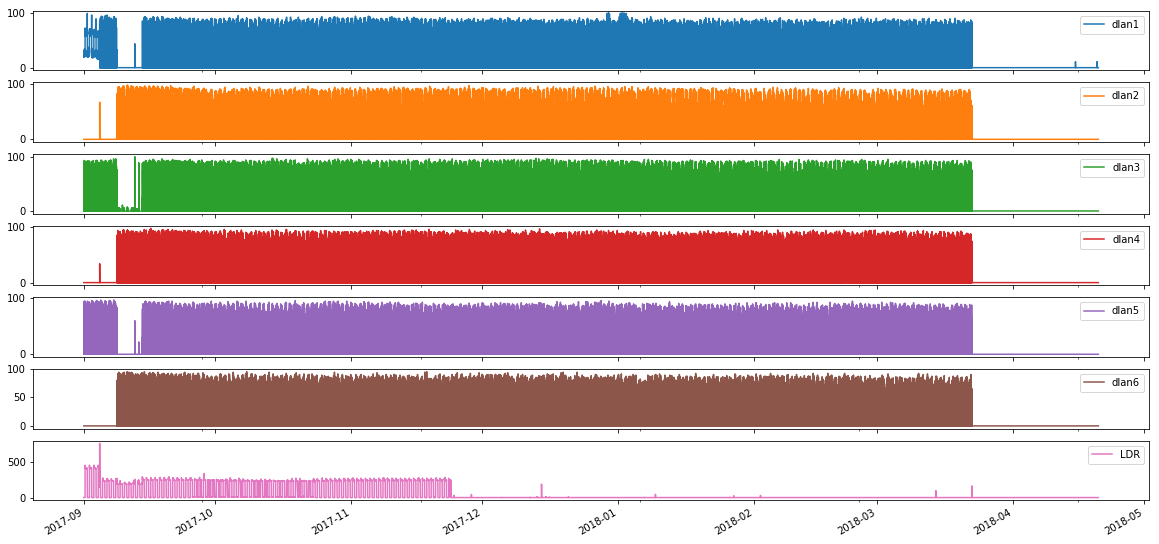

In [6]:
quickplot(data)

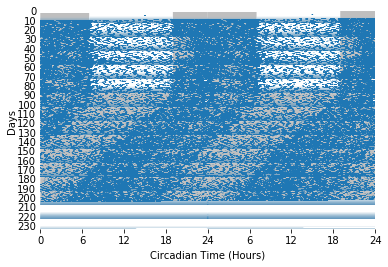

In [7]:
act.actogram_plot_from_df(data, 
                          animal_number=3,
                          period="24H",
                          showfig=True)

Conclusions? Appears fine, no major problems with the LDR. 
Will check values going to 0 or not during the dim light section. 

### Step Three - set all non-experimental times to 0 



In [8]:
# activity start?
activity_start = '2017-09-15 00:00'
data.loc[:activity_start] = 0

In [9]:
# activity_end?
activity_end = '2018-03-23 00:00'
data.loc[activity_end:] = 0

### Step four - find transitions and label

comes from dlan actograms notebook in old github

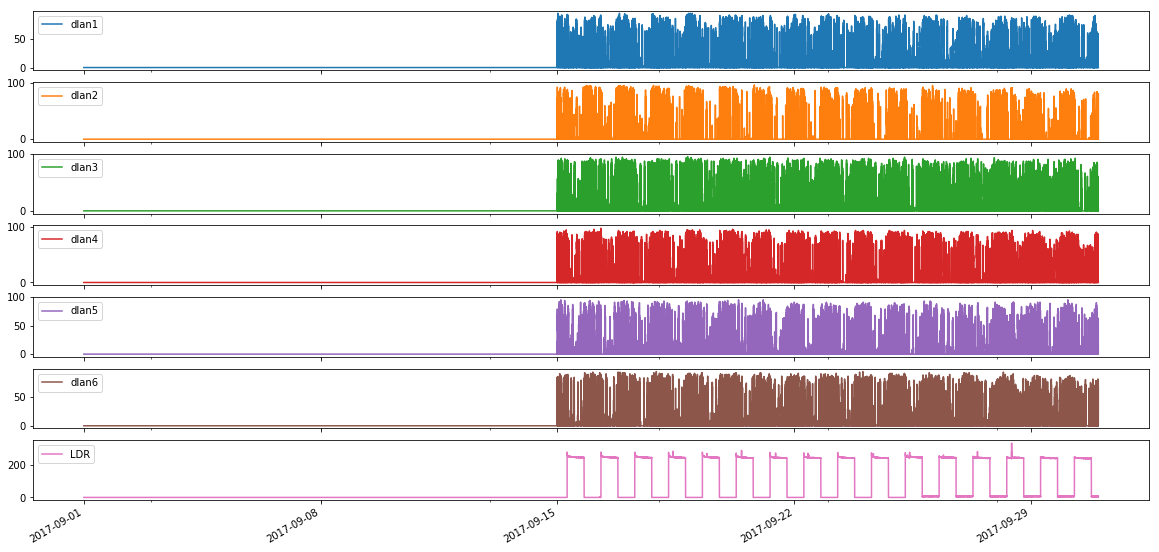

In [10]:
# slice off the initial validation period 
quickplot(data['2017-9'])

In [11]:
# create new df to label 
data_annotated = data['2017-09-15':].copy()

In [12]:
# Define the baseline period 
baseline_start = '2017-9-15 07:00:20'
baseline_end = '2017-9-25 07:00:20'
baseline_data = data.loc[baseline_start:baseline_end]

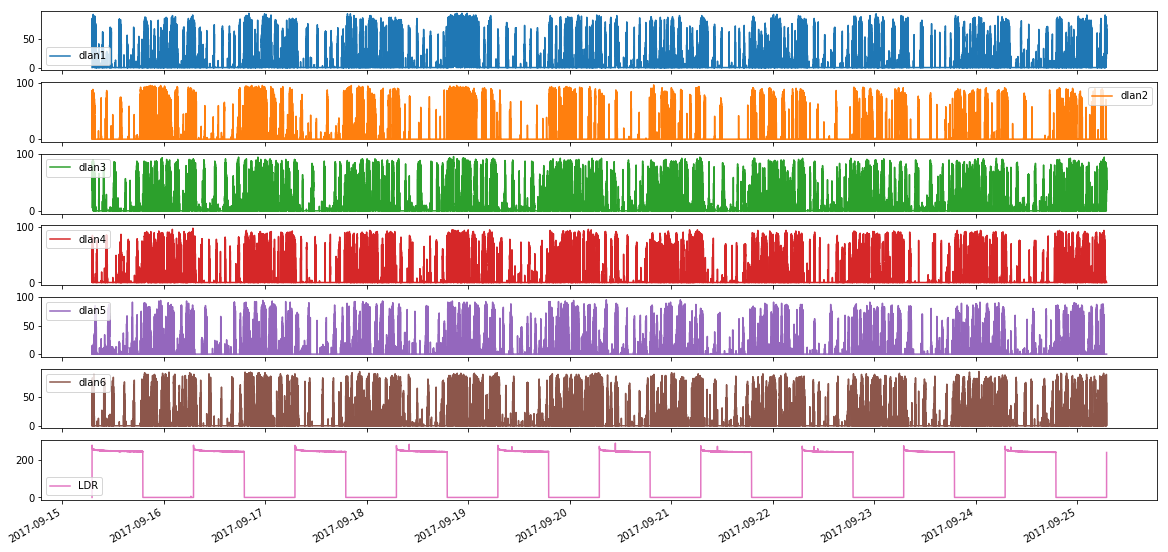

In [13]:
quickplot(baseline_data)

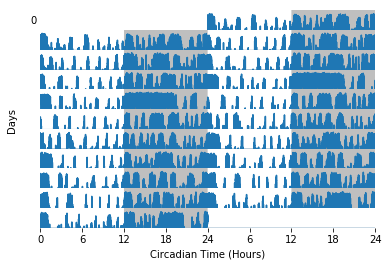

In [14]:
act.actogram_plot_from_df(baseline_data, 0)

In [15]:
# set the light_period_column 
data_annotated.loc[baseline_start:baseline_end,
                   label_col] = "Baseline"

In [16]:
# Disrupted period 
disrupted_start = "2017-9-25 07:00:20"
disrupted_end = "2017-10-23 07:00:20"
disrupted_data = data.loc[disrupted_start:disrupted_end]

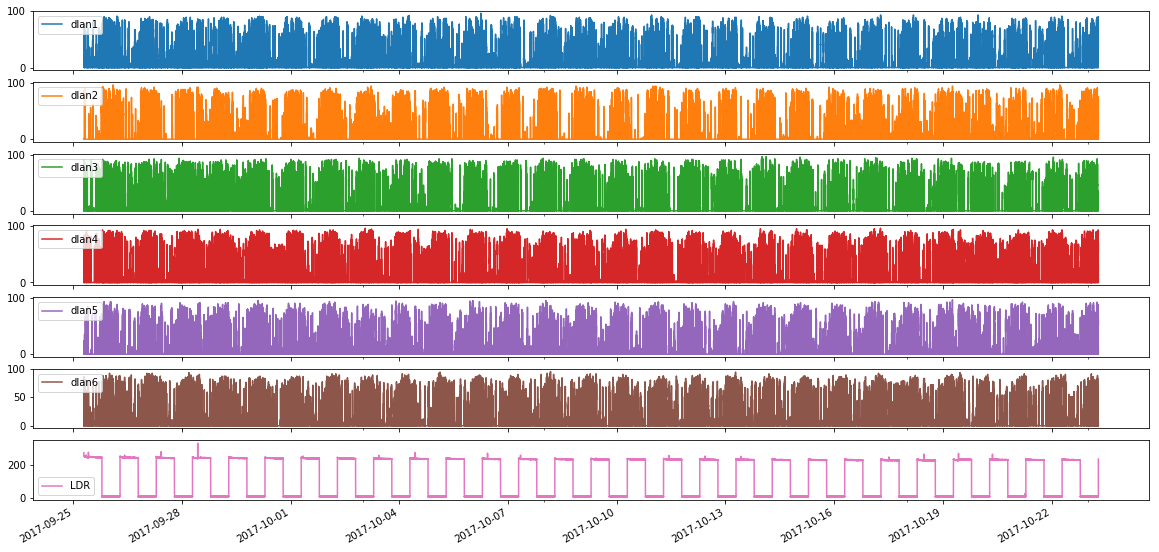

In [17]:
quickplot(disrupted_data)

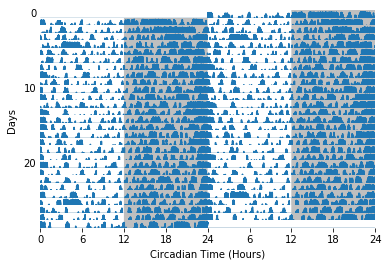

In [18]:
act.actogram_plot_from_df(disrupted_data, 0, figsize=(20,10))

In [19]:
# check whether any values return to 0 during the dim 
# light at night portion 
disrupted_data[disrupted_data.iloc[:,-1]==0]

,dlan1,dlan2,dlan3,dlan4,dlan5,dlan6,LDR


In [20]:
# change the LDR values to show that it is high night during disrupted period 
# using a mask of where the values are >1 and <100 to set to medium value
# of 120 which should show up on the actogram
ldr_label = data.columns[-1]
data_annotated.loc[disrupted_start:disrupted_end,
                   ldr_label].mask(
                        (data_annotated.loc[:,ldr_label]<100)&
                        (data_annotated.loc[:,ldr_label]>1),
                        other=120,
                        inplace=True)

In [21]:
data_annotated.loc[disrupted_start:disrupted_end,
                   label_col] = "Disrupted"

In [22]:
post_baseline_start = "2017-10-23 07:00:00"
post_baseline_end = "2017-11-24 07:00:00"
post_baseline_data = data.loc[post_baseline_start:
                              post_baseline_end]

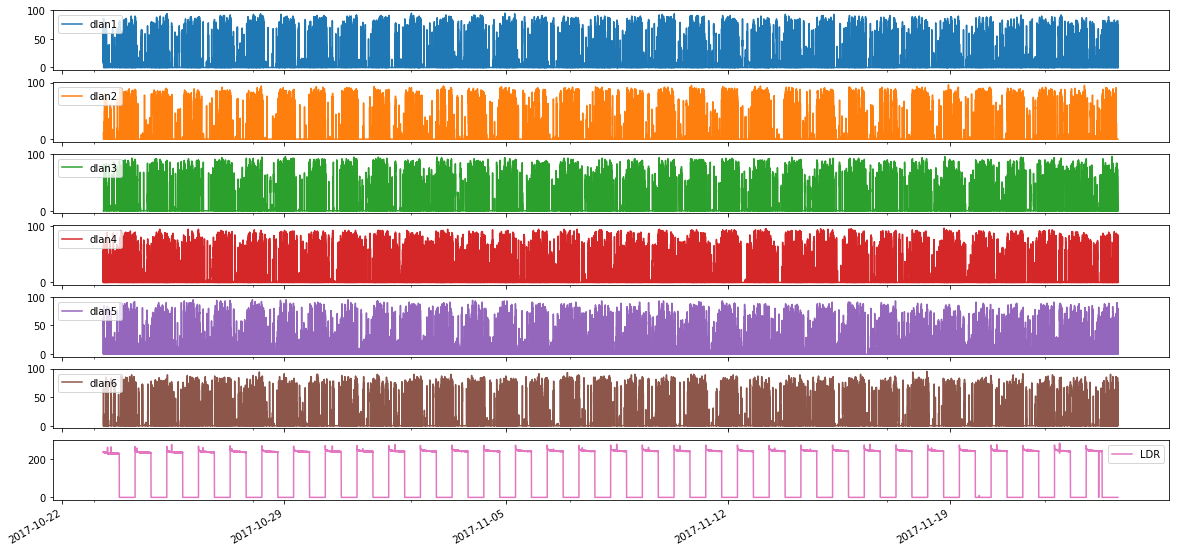

In [23]:
quickplot(post_baseline_data)

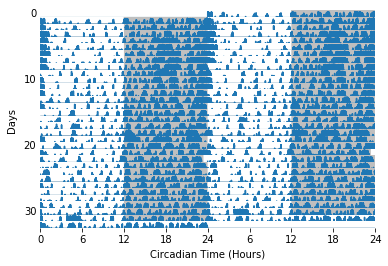

In [24]:
act.actogram_plot_from_df(post_baseline_data,0)

In [25]:
data_annotated.loc[post_baseline_start:post_baseline_end,
                   label_col] = "Recover"

In [26]:
dd_start = "2017-11-24 07:00:00"
dd_end = "2018-3-22 07:00:00"
dd_data = data.loc[dd_start:dd_end]

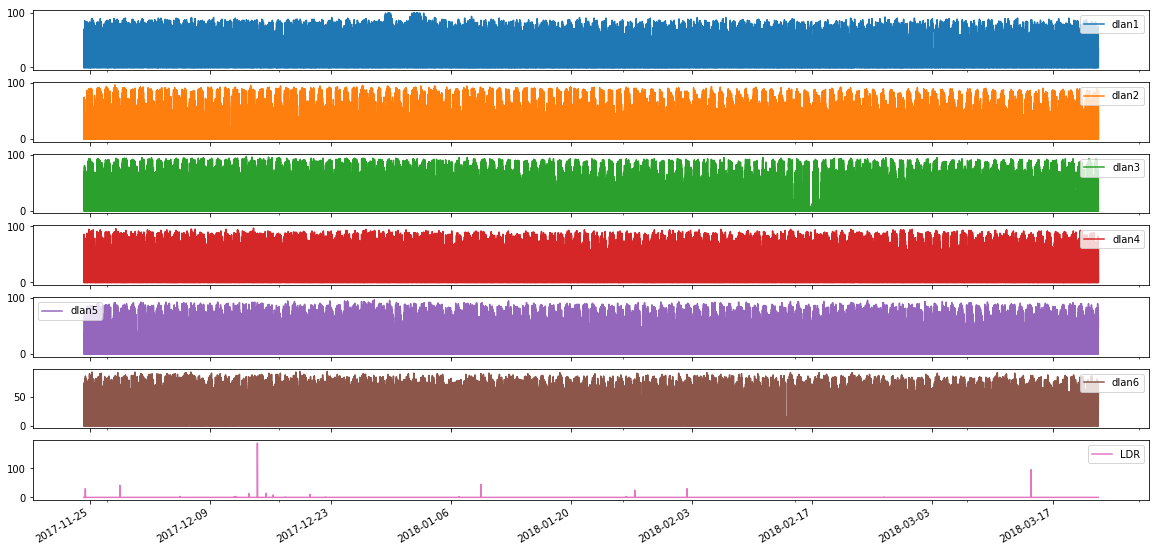

In [27]:
quickplot(dd_data)

act.actogram_plot_from_df(dd_data,0)

In [28]:
data_annotated.loc[dd_start:dd_end,
                   label_col] = "post_dd"

In [29]:
data_reset = data_annotated.reset_index()
index_to_use = [data_reset.columns[-1], data_reset.columns[0]]
data_reset.set_index(index_to_use, inplace=True) 

In [30]:
save_dir = pathlib.Path("/Users/angusfisk/Documents/01_PhD_files/"
                        "01_projects/01_thesisdata/02_circdis/"
                        "01_data_files/01_activity")
file_name = "DLAN.csv"
file_path = save_dir / file_name
data_reset.to_csv(file_path)

### Bonus extra

Plot the actogram for just the parts we are interested in

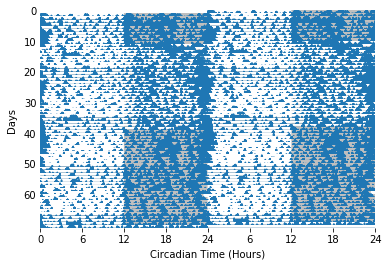

In [31]:
df_act_plot = data_annotated.loc[baseline_start:
                                 post_baseline_end, :'LDR']
act.actogram_plot_from_df(df_act_plot, 0)